# Logistic regression model in Julia

The logistic regression model is a binary classification model which output, which target, is true or false, is 1 or zero, is yes or no.
The function that we will use here is the sigmoid function, the logistic function. $$g(z(a,b)) = \dfrac{1}{1+e^{-z}}$$
with $z = \mathbf a \cdot \mathbf x + b$.

This function in such way represents the probabilities that the class being zero or one. $g_{a,b} (x) = P(y=1|\mathbf x; \mathbf a, b)$ we can value the probabiliti for $y = 0$ too of course.

This function by itself don't give us a binary classification since we it return a number in a continuous space of values between $0$ and $1$. To make it really binary we can set a threshold above which yout set $\hat y = 1$ and below which you set $\hat y = 0$, usually this number is $0.5$ 
$$\hat y  = \begin{cases} 1 \qquad g(z(a,b)) \geq 0.5 \\ 0 \qquad g(z(a,b)) < 0.5. \end{cases}$$
Note that $g(z(a,b)) \geq 0.5 \text{ when } z \geq 0 $ and $g(z(a,b)) < 0.5 \text{ when } z < 0 $.


In [20]:
# Importing the libraries
using Pkg
using Plots
using LinearAlgebra
using LaTeXStrings
using Distributions
using ForwardDiff

Let's create a discreet distribution in two-dimensional that looks like linear $P = \{(x,y) \in \mathbb{N}^2 \ \ | \ \ 1 \leq x \leq 10 \ \text{ and } \ y = x \pm 1 \}$

In [21]:
# Declaring the constants that controls the size of the array and the confidence interval.
NUMBER_OF_POINTS = 10
UNCERTAINTY_INTERVAL = 1 

1

In [22]:
# Creating the array x and y with the size "number_of_points" and with y having a little variation determined by "uncertainty_interval"
x = [i + 1 for i in 0:(NUMBER_OF_POINTS - 1)]
y = [i + (1 + (rand()*2-1)*UNCERTAINTY_INTERVAL) for i in 0:(NUMBER_OF_POINTS - 1)]

10-element Vector{Float64}:
  1.1659100036871701
  1.8253526766733532
  2.775502467171599
  4.348191545142548
  5.266144311016685
  5.483816608724974
  6.371171400424057
  8.981050213819694
  9.437207862079942
 10.739238438793546

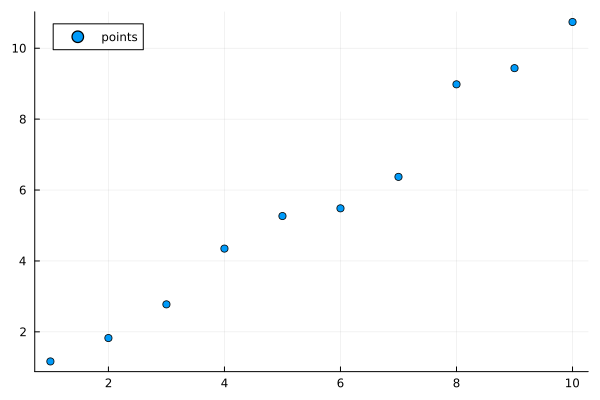

In [23]:
# The graphic of this distribution.
gr()
scatter(x, y, label="points")

Defining our $\hat y = a*x + b$

In [24]:
ŷ(a, b) =  a * x .+ b

ŷ (generic function with 1 method)

$\color{red}Cost function$: Squared error cost function. Here the cost function will assume the following form: $J(a, b)=\dfrac{1}{2n}\sum_{i=1}^n(\hat y^i(a,b)-y^i)^2$

In [25]:
J(a, b) = (1/(2*NUMBER_OF_POINTS)) * sum((ŷ(a, b)-y).^2)

J (generic function with 1 method)

In [26]:
J(1, 0)

0.13312257563364543

Once we want to get a goood approximation, our objective is minimaze the cost function 

## Analyzing how function J behaves with respect to $\hat y$

Passing as a parameter $\mathbf a$ five arrays where the first is composed only of numbers -1, the second of zeros, the third of 1, the fourth of 2 and the fifth of 3 and keeping the $b$ as zero

In [27]:
J(0, 0)

20.73745925630695

In [28]:
values = [i for i in -1:1:3]
values

5-element Vector{Int64}:
 -1
  0
  1
  2
  3

In [31]:
values = [i for i in -1.5:0.5:3]

10-element Vector{Float64}:
 -1.5
 -1.0
 -0.5
  0.0
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0

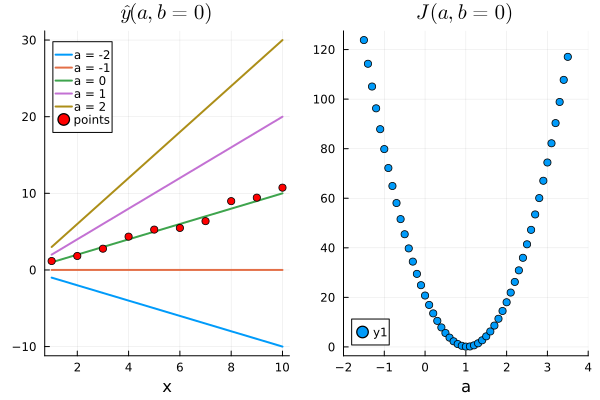

In [38]:
values = [i for i in -1:1:3]
p1 = plot(x, ŷ.(values, 0),
         label=["a = -2" "a = -1" "a = 0" "a = 1" "a = 2"],
         linewidth=2)
scatter!(x, y, label="points", mc=:red)
title!(L"$\hat y (a,b=0)$")
xlabel!("x")


values = [i for i in -1.5:0.1:3.5]
p2 = scatter(values, J.(values, 0))
title!(L"$J(a,b=0)$")
xlims!(-2, 4)
xlabel!("a")

             
plot(p1, p2, layout=(1,2), legend = true)

Clearly we see that the best feat happens when $\mathbf a = 1$ and at this point we can see that the $J$ is a minimum.

it is important to emphasize that for linear regression the squared error cost function will always end up giving us a bow shape or a hammock shape. But if we are not working with a linear regression or if we change the type of the cost function will we not have necessary anymore this bow shape.

## The gradient descent 

we want to find the $\min_{a,b}J(x,a,b)$, for this we:
<ol>
    <li>Give an initial a, b
    <li>Keep changing a, b to reduce J(a, b)
    <li>Until we settle at or near a minimum (sometimes we will have more the one minimum)
</ol>

The changing on the variables will be done though: $a^i \leftarrow a^i - \alpha\dfrac{\partial J(a^i)}{\partial a^i}$, with $\alpha$ being the <u>learning rate</u>.

Using the "ForwardDiff" labrarie. We have this gradient function that calculates the derivative 

In [11]:
function ∇(a, b)
    w = [a; b]
    J(w) = (1/(2*NUMBER_OF_POINTS)) * sum( (ŷ(w[1], (w[2]))-y).^2 )
    result = ForwardDiff.gradient(J, w)
    return result[1], result[2]
end

∇ (generic function with 1 method)

In [12]:
# Just testing
∇(1, 0)

(0.5122626908681049, 0.15203858493110123)

Creating a function that will pick the inicial values ($\mathbf a$, $b$), $\alpha$ and the number of iterations $n$ that we will do to maximize the fit of $\hat y$ and minimaze the error cost function.

Note that the parameter $\alpha$ update itself in each iteraction in order to avoid divergency.

In [13]:
function gradient_descent(a, b, αₐ, αᵦ, n)
    for n ∈ 1:n 
        a = a - αₐ.*∇(a, b)[1]
        b = b - αᵦ*∇(a, b)[2]
    end
    return a, b
end

gradient_descent (generic function with 1 method)

In [14]:
a, b = gradient_descent(10, 10, 0.001, 0.001, 10000)

(0.8820429083679199, 0.7265538921138576)

Observe that the function gradient_descent will use the function gradient $\nabla$ that use $\hat y$.

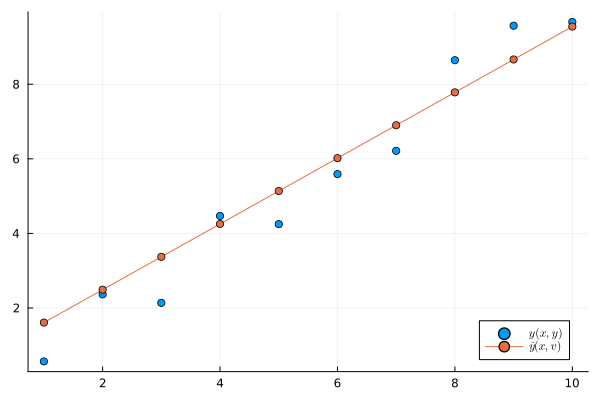

┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots C:\Users\mackh\.julia\packages\Plots\Pn7Zn\src\utils.jl:134
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots C:\Users\mackh\.julia\packages\Plots\Pn7Zn\src\utils.jl:134
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots C:\Users\mackh\.julia\packages\Plots\Pn7Zn\src\utils.jl:134
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots C:\Users\mackh\.julia\packages\Plots\Pn7Zn\src\utils.jl:134
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots C:\Users\mackh\.julia\packages\Plots\Pn7Zn\src\utils.jl:134
┌ Warning: Indices Base.OneTo(1) of attribute `markershape` does not match data indices 1:10.
└ @ Plots C:\Users\mackh\.julia\packages\Plots\Pn7Zn\src\utils.jl:134


In [15]:
scatter(x, y, label=L"y(x,y)")
plot!(x, ŷ(a, b), label=L"\hat y (x,v)", markershapes=[:circle])

At the end of the day our function $$\hat y(x) = a*x +b$$ becomes:

In [16]:
ŷ(x) = a*x+b

ŷ (generic function with 2 methods)

### checking the convergence of the gradient descent.

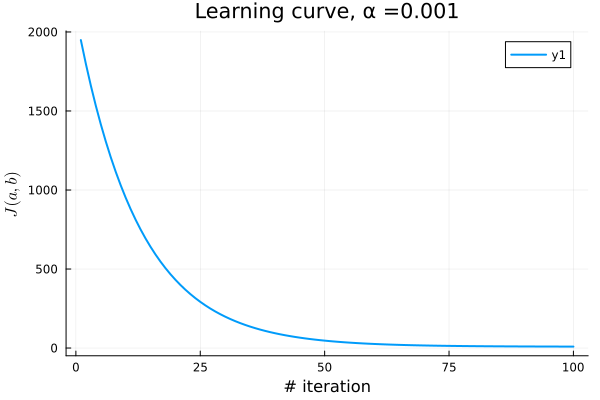

In [47]:
a = []
b = []
α = 0.001
n = range(1,100)
for i ∈ n
    push!(a, gradient_descent(10, 10, α, α, i)[1])
    push!(b, gradient_descent(10, 10, α, α, i)[2])
end

plot(n, J.(a[n],b[n]), linewidth=2)
title!("Learning curve, α =$α")
xlabel!("# iteration")
ylabel!(L"$J(a,b)$")